#**Song Popularity Dataset - Regression Model Training**
Song Popularity Dataset: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset?resource=download

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [53]:
sns.set_style("whitegrid")
sns.set_palette("Paired")

In [54]:
palette = sns.color_palette()

In [55]:
sns.color_palette()

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [373]:
df = pd.read_csv("song_data.csv")
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


###**Objectives:**
* Perform thorough data analysis (this should include at least 1 or 2 types of charts)
* Perform any type of data transformation/cleaning (if needed)
* Build the Model using the specified algorithm type: Regression/Classification/Clustering
* Make some predictions
* Evaluate the predictions

##**Data Cleaning & Exploration**

Before building a model it is crucial to ensure that the features in the dataset have no missing values or duplicates and to convert any categoricals into numericals.

In [374]:
df.shape

(18835, 15)

In [375]:
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

This dataset has only one categorical feature, the name of the songs that will not be included in the model training process, therefore I will not need to convert it into numerical.

In [376]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Thankfully there are no null values in this dataset so there's no need to drop or impute any feature values.

In [377]:
df["song_name"].value_counts().sum(), df.shape

(18835, (18835, 15))

Looks like all songs are unique so there is no need to drop records either.

In [378]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


The regressor I will be building will try to predict the popularity of new songs. Let's start with understanding the target feature by looking at the distribution of 'song_popularity'.

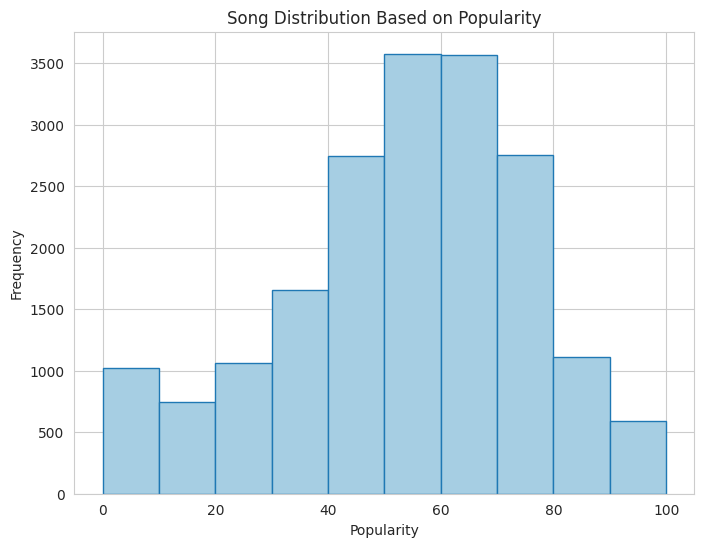

In [379]:
plt.figure(figsize=(8, 6))
plt.hist(df['song_popularity'], bins=10, color=palette[0], edgecolor=palette[1])
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Song Distribution Based on Popularity')
plt.grid(True)
plt.show()

Looking at the above plot the popularity of songs has an approximately normal distribution, most of the songs on the dataset have a medium popularity. There are around 500 songs that have the highest popularity and around 800 songs that have the lowest popularity.

In [380]:
def milliseconds_to_minutes(milliseconds):
    return milliseconds / (1000 * 60)

Since the song duration is in milliseconds, I will use a function to convert it into minutes just to see what range do the feature values take.

In [381]:
df["song_duration_ms"].min()

12000

In [382]:
minutes = milliseconds_to_minutes(df["song_duration_ms"].min())
minutes

0.2

This seems oddly small to me, as no song is this short.

In [383]:
df["song_duration_ms"].max()

1799346

In [384]:
minutes = milliseconds_to_minutes(df["song_duration_ms"].max())
minutes

29.9891

Not many songs are this long either, but maybe this could be a classical piece so therefore I will keep songs that are longer.

In [385]:
df["song_duration_ms"].mean()

218211.5875763207

In [386]:
minutes = milliseconds_to_minutes(df["song_duration_ms"].mean())
minutes

3.636859792938678

The average song in the dataset is 3.63 minutes long, which seems accurate. In order to get rid of any possible outliers I will drop all records where the songs fall under 2 minutes (~120,000 ms).

In [387]:
df.shape

(18835, 15)

In [388]:
df = df[df['song_duration_ms'] >= 120000]

In [389]:
df.shape

(18480, 15)

In [390]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

The following collumns describe the composition of the songs.

In [391]:
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
           'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo',
           'time_signature', 'audio_valence']

In [392]:
summary_data = {
    'Column': [],
    'Min': [],
    'Max': [],
    'Mean': []
}

In [393]:
for col in columns:
    col_min = df[col].min()
    col_max = df[col].max()
    col_mean = df[col].mean()

    summary_data['Column'].append(col)
    summary_data['Min'].append(col_min)
    summary_data['Max'].append(col_max)
    summary_data['Mean'].append(col_mean)

summary_df = pd.DataFrame(summary_data)
summary_df

,Column,Min,Max,Mean
0,acousticness,0.000001,0.996,0.253017
1,danceability,0.059400,0.987,0.632951
2,energy,0.001070,0.999,0.649040
3,instrumentalness,0.000000,0.989,0.070860
4,key,0.000000,11.000,5.284145
5,liveness,0.010900,0.986,0.179664
6,loudness,-38.768000,1.585,-7.371366
7,audio_mode,0.000000,1.000,0.629600
8,speechiness,0.022400,0.941,0.100683
9,tempo,46.591000,242.318,121.248591


In [394]:
sns.color_palette()

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

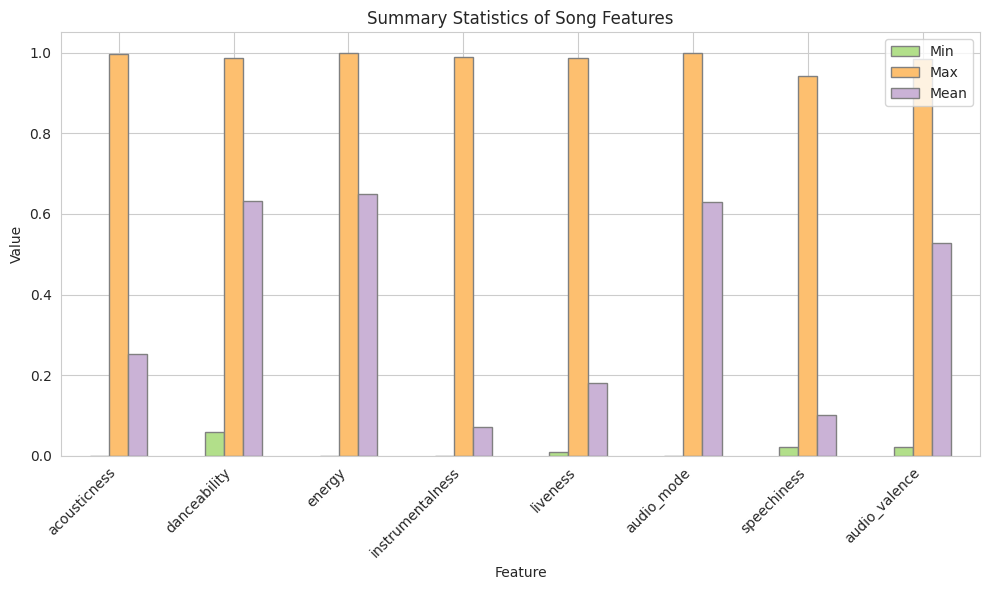

In [395]:
columns_to_plot = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'audio_mode', 'speechiness', 'audio_valence']
summary_df_filtered = summary_df[summary_df['Column'].isin(columns_to_plot)]
colors = [palette[2], palette[6], palette[8]]
ax = summary_df_filtered.set_index('Column').plot(kind='bar', figsize=(10, 6), color=colors, edgecolor='grey')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Summary Statistics of Song Features')
plt.xticks(rotation=45, ha='right')
ax.set_xticklabels(summary_df_filtered['Column'])
plt.legend(['Min', 'Max', 'Mean'], loc='upper right')
plt.tight_layout()
plt.show()

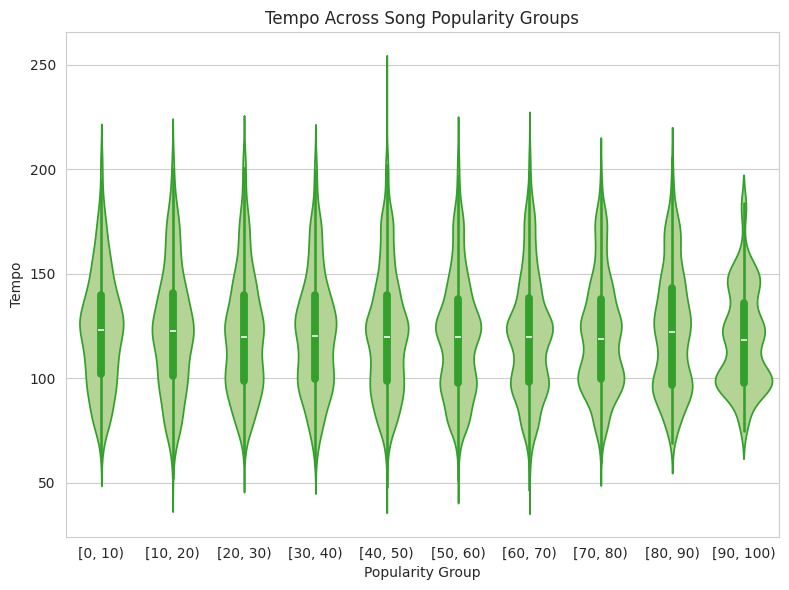

In [396]:
categorical_variable = 'song_popularity'
numerical_variable = 'tempo'

df['popularity_group'] = pd.cut(df[categorical_variable], bins=range(0, 101, 10), right=False)

melted_df = pd.melt(df, id_vars=['popularity_group'], value_vars=[numerical_variable], var_name='Tempo', value_name='Value')

plt.figure(figsize=(8, 6))
ax = sns.violinplot(x='popularity_group', y='Value', data=melted_df, color=palette[2], edgecolor=palette[3])
plt.title('Tempo Across Song Popularity Groups')
plt.xlabel('Popularity Group')
plt.ylabel('Tempo')
plt.tight_layout()
plt.show()

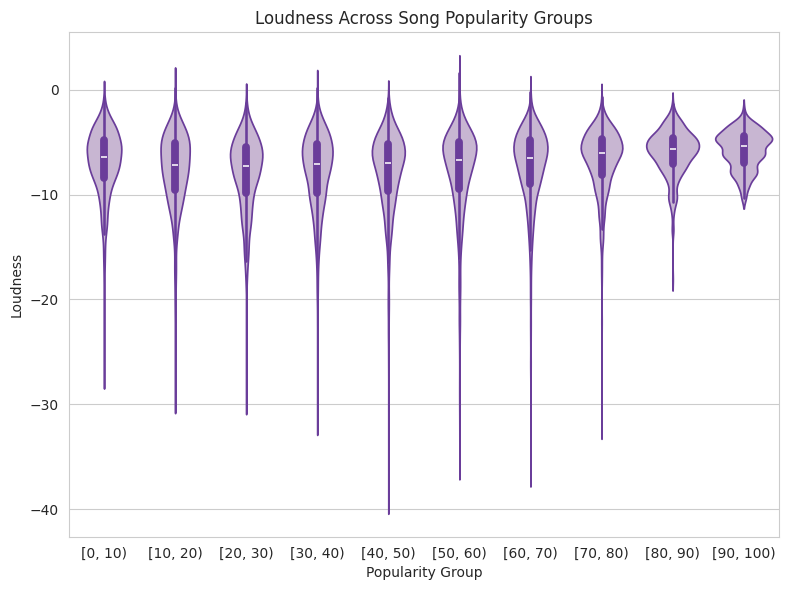

In [397]:
categorical_variable = 'song_popularity'
numerical_variable = 'loudness'

df['popularity_group'] = pd.cut(df[categorical_variable], bins=range(0, 101, 10), right=False)

melted_df = pd.melt(df, id_vars=['popularity_group'], value_vars=[numerical_variable], var_name='Loudness', value_name='Value')

plt.figure(figsize=(8, 6))
ax = sns.violinplot(x='popularity_group', y='Value', data=melted_df, color=palette[8], edgecolor=palette[9])
plt.title('Loudness Across Song Popularity Groups')
plt.xlabel('Popularity Group')
plt.ylabel('Loudness')
plt.tight_layout()
plt.show()

In [398]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'popularity_group'],
      dtype='object')

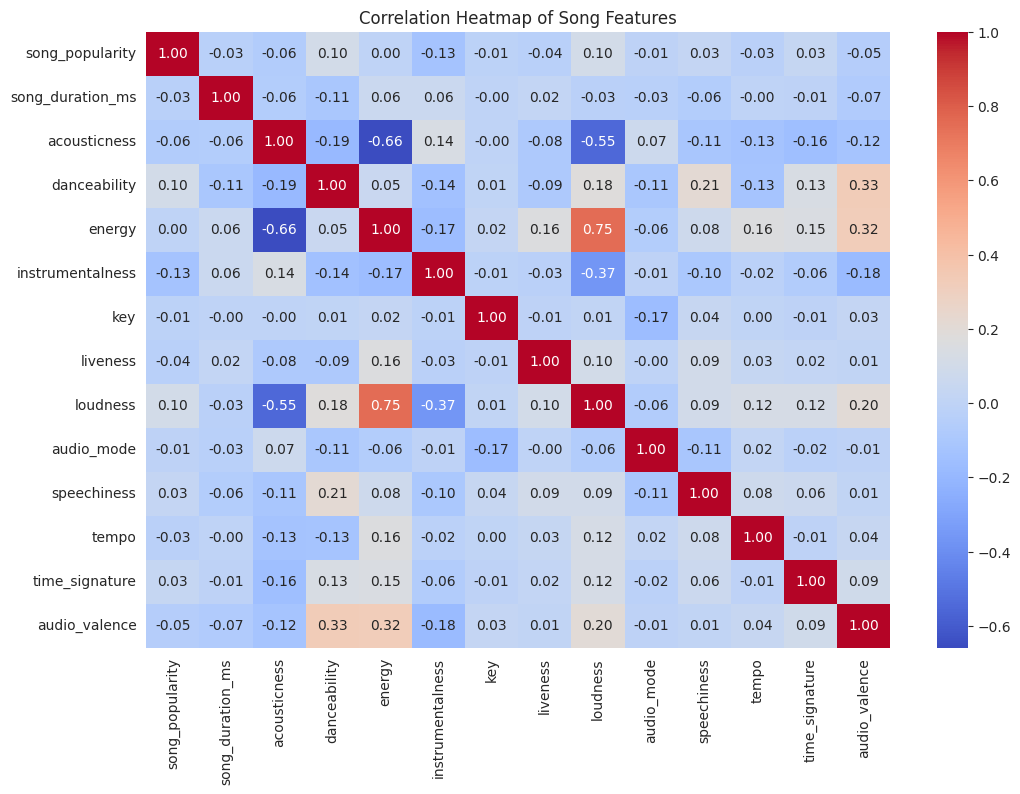

In [402]:
corr_matrix = df.drop(["song_name", "popularity_group"], axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Song Features')
plt.show()

On the above plot we can see that the 'energy' and 'loudness' features have a strong positive correlation, for many of the songs in the dataset if one value is high so is the other. This indicates that we might not need both columns to build our model. There is also some negative correlation between the 'energy' and 'acousticness' as well as between the 'loudness' and 'acousticness', meaning that the opposite iis true.

##**Feature Engineering & Predictive Modeling**

First I will train some baseline predictors.

In [ ]:
df.columns

In [ ]:
df.isna().sum()

I will drop the popularity group and name of songs columns since I will no longer need them.

In [276]:
df.drop(["popularity_group", "song_name"], axis=1, inplace=True)

In [297]:
#Splitting the data into X (input features) and y (target feature)

X = df.drop("song_popularity", axis=1)
y = df["song_popularity"]

X.shape, y.shape

((18480, 13), (18480,))

1. Splitting the data into train and test splits

In [298]:
#Splitting the data into train and test splits

from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14784, 13), (3696, 13), (14784,), (3696,))

2. Choosing models for predicting
I will try 3 popular regressors:
* LinearRegression
* SupportVectorRegression (SVR)
* RandomForestRegressor


In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [300]:
#Creating a dictionary to store the models
models = {
    'LinearRegression': LinearRegression(),
    'SupportVectorRegression': SVR(),
    'RandomForestRegression': RandomForestRegressor()
}

3. Fitting the models & 4. Evaluating the prediction accuracies

In [301]:
#Creating a function for fitting and scoring the models

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}  # Making a model_scores dictionary to store scores
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        model_scores[name] = {'MAE': mae, 'MSE': mse, 'R^2': r2}
    return model_scores

In [302]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'LinearRegression': {'MAE': 16.802654160676873,
  'MSE': 449.286883817467,
  'R^2': 0.04491089596961095},
 'SupportVectorRegression': {'MAE': 16.946178748905353,
  'MSE': 475.6701185658797,
  'R^2': -0.011174293571605043},
 'RandomForestRegression': {'MAE': 12.072765828842263,
  'MSE': 285.7472949244241,
  'R^2': 0.3925615509413509}}

**Comparing Results of Baseline Regressors**

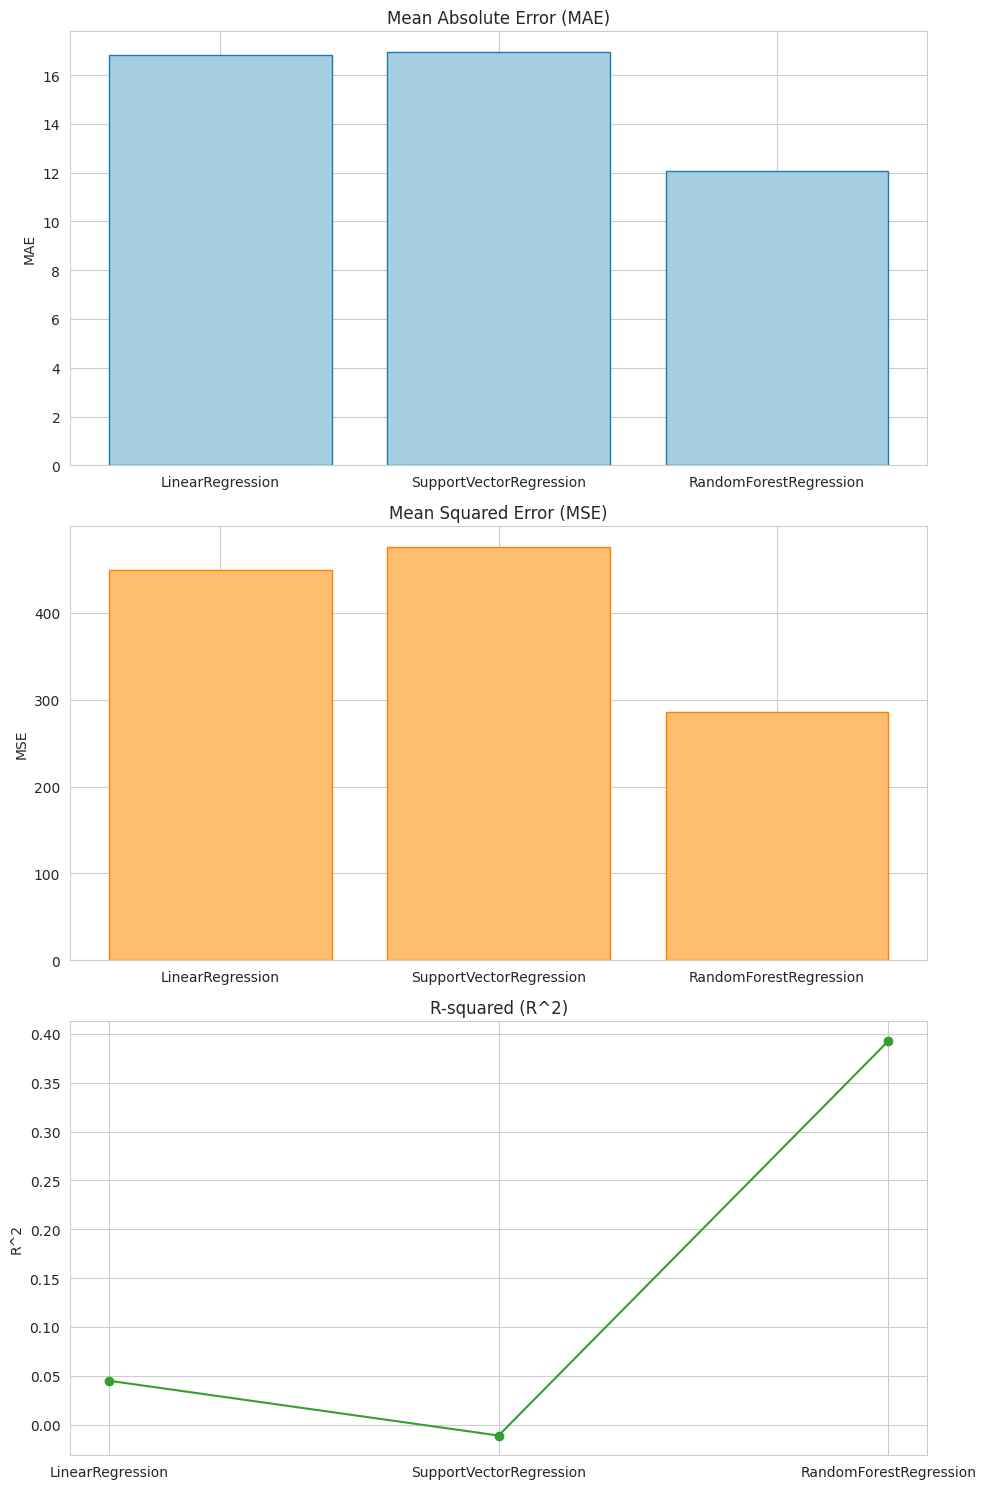

In [371]:
model_names = list(model_scores.keys())
mae_scores = [score['MAE'] for score in model_scores.values()]
mse_scores = [score['MSE'] for score in model_scores.values()]
r2_scores = [score['R^2'] for score in model_scores.values()]

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

#Plotting MAE
axs[0].bar(model_names, mae_scores, color=palette[0], edgecolor=palette[1])
axs[0].set_ylabel('MAE')
axs[0].set_title('Mean Absolute Error (MAE)')

#Plotting MSE
axs[1].bar(model_names, mse_scores, color=palette[6], edgecolor=palette[7])
axs[1].set_ylabel('MSE')
axs[1].set_title('Mean Squared Error (MSE)')

#Plotting R^2
axs[2].plot(model_names, r2_scores, marker='o', color=palette[3])
axs[2].set_ylabel('R^2')
axs[2].set_title('R-squared (R^2)')

plt.tight_layout()
plt.show()

**Mean Absolute Error (MAE):**
* MAE measures the average absolute difference between the predicted popularity values and the actual popularity values.
* The MAE values range from approximately 12 to 17, lower MAE values indicate better model performance. Considering the range of song popularity from 0 to 100, an MAE of around 12 to 17 may be considered relatively high, as it represents a significant absolute difference in popularity prediction.

**Mean Squared Error (MSE):**
* MSE measures the average squared difference between the predicted popularity values and the actual popularity values.
* The MSE values range from approximately 285 to 475. Lower MSE values indicate better model performance, given the scale of popularity values, MSE values around 285 to 475 may also be considered relatively high.

**R-squared (R^2):**
* R-squared measures the proportion of the variance in the song popularity that is explained by the features included in the model.
* The R^2 values range from approximately -0.011 to 0.393. R^2 values closer to 1 indicate that the model explains a larger proportion of the variance in the popularity values. An R^2 value of 0 suggests that the model does not explain any of the variance in the popularity values, while negative R^2 values indicate that the model performs worse than a horizontal line.
An R^2 value of 0.393 for the Random Forest Regression model suggests that it explains approximately 39.3% of the variance in the popularity values, which may be considered moderate.

In summary, while the Random Forest Regression model performs relatively better compared to the Linear Regression and Support Vector Regression models, the overall performance of all models may be considered relatively poor given the scale and range of popularity values.
For bettering my models, I will scale the data using both MinMaxScaler and StandardScaler and train the models again on the scaled data.

**Scaling the dataset using MinMaxScaler**

In [303]:
#Scaling the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)
scaler_m = MinMaxScaler()
X_train_m = scaler_m.fit_transform(X_train)
X_test_m = scaler_m.transform(X_test)

In [304]:
X_train_m

array([[0.02389025, 0.08463762, 0.41677447, ..., 0.40593275, 0.8       ,
        0.021436  ],
       [0.11153866, 0.91365453, 0.32298404, ..., 0.46223056, 0.6       ,
        0.16129032],
       [0.04976521, 0.59136504, 0.51595515, ..., 0.08296249, 0.8       ,
        0.52445369],
       ...,
       [0.03701441, 0.18875419, 0.52242346, ..., 0.18843082, 0.8       ,
        0.45057232],
       [0.11403606, 0.00373392, 0.86847779, ..., 0.28694559, 0.8       ,
        0.23413111],
       [0.03551383, 0.0187741 , 0.53212592, ..., 0.41591605, 0.8       ,
        0.55046826]])

In [305]:
#Fitting and scoring using the scaled data (MinMaxScaler)

np.random.seed(42)
model_scores_m = fit_and_score(models, X_train_m, X_test_m, y_train, y_test)
model_scores_m

{'LinearRegression': {'MAE': 16.802654160676873,
  'MSE': 449.28688381746696,
  'R^2': 0.044910895969611064},
 'SupportVectorRegression': {'MAE': 16.301673364822832,
  'MSE': 447.32290547100376,
  'R^2': 0.049085899484783035},
 'RandomForestRegression': {'MAE': 12.066001305488156,
  'MSE': 284.67156195463735,
  'R^2': 0.3948483322280868}}

The best performing model is the RandomForestRegression model so I will try to tune it's hyperparameters.

**Scaling the dataset using StandardScaler**

In [307]:
#Scaling the data using StandardScaler

from sklearn.preprocessing import StandardScaler

np.random.seed(42)
scaler_s = StandardScaler()
X_train_s = scaler_s.fit_transform(X_train)
X_test_s = scaler_s.transform(X_test)

In [308]:
X_train_s

array([[-1.03270481, -0.58883865, -1.19370699, ...,  0.16477922,
         0.13819897, -1.98829826],
       [ 1.47587236,  2.32630668, -1.74995599, ...,  0.54841641,
        -3.25571073, -1.43792471],
       [-0.29214008,  1.19301172, -0.60548966, ..., -2.03607764,
         0.13819897, -0.00875531],
       ...,
       [-0.6570795 , -0.22272436, -0.56712766, ..., -1.31737153,
         0.13819897, -0.29950324],
       [ 1.54735024, -0.87332746,  1.48523934, ..., -0.64604996,
         0.13819897, -1.15127182],
       [-0.70002758, -0.82044036, -0.50958466, ...,  0.23280962,
         0.13819897,  0.09362072]])

In [309]:
#Fitting and scoring using the scaled data (StandardScaler)

np.random.seed(42)
model_scores_s = fit_and_score(models, X_train_s, X_test_s, y_train, y_test)
model_scores_s

{'LinearRegression': {'MAE': 16.802654160676873,
  'MSE': 449.28688381746696,
  'R^2': 0.044910895969611064},
 'SupportVectorRegression': {'MAE': 16.087482645839223,
  'MSE': 441.11779581976464,
  'R^2': 0.06227665316727882},
 'RandomForestRegression': {'MAE': 12.06200640204672,
  'MSE': 285.50860769815546,
  'R^2': 0.3930689496153196}}

In [311]:
model_scores_m

{'LinearRegression': {'MAE': 16.802654160676873,
  'MSE': 449.28688381746696,
  'R^2': 0.044910895969611064},
 'SupportVectorRegression': {'MAE': 16.301673364822832,
  'MSE': 447.32290547100376,
  'R^2': 0.049085899484783035},
 'RandomForestRegression': {'MAE': 12.066001305488156,
  'MSE': 284.67156195463735,
  'R^2': 0.3948483322280868}}

In [312]:
model_scores

{'LinearRegression': {'MAE': 16.802654160676873,
  'MSE': 449.286883817467,
  'R^2': 0.04491089596961095},
 'SupportVectorRegression': {'MAE': 16.946178748905353,
  'MSE': 475.6701185658797,
  'R^2': -0.011174293571605043},
 'RandomForestRegression': {'MAE': 12.072765828842263,
  'MSE': 285.7472949244241,
  'R^2': 0.3925615509413509}}

We can see that the data scaled using MinMaxScaler did better for each of the three baseline models. From now on I will be using the data scaled with MinMaxScaler. I will create two new DataFrames that contain the scaled train and test data (X_train and X_test) and keep the names of the columns the same.

In [313]:
#Creating new X_train and X_test dataframes scaled using the MinMaxScaler instance scaler_m

column_names = X_train.columns #The column names are the same for X_train and X_test

np.random.seed(42)

X_train = pd.DataFrame(X_train_m, columns=column_names)

X_test = pd.DataFrame(X_test_m, columns=column_names)

In [314]:
X_train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.023890,0.084638,0.416774,0.327608,0.000032,0.181818,0.095477,0.725879,1.0,0.029393,0.405933,0.8,0.021436
1,0.111539,0.913655,0.322984,0.169280,0.000242,0.363636,0.101631,0.694415,1.0,0.009144,0.462231,0.6,0.161290
2,0.049765,0.591365,0.515955,0.126191,0.000173,1.000000,0.232899,0.566218,1.0,0.006532,0.082962,0.8,0.524454
3,0.087732,0.551204,0.439414,0.831652,0.000000,0.909091,0.963081,0.775542,1.0,0.049967,0.463728,0.8,0.545265
4,0.034696,0.000619,0.554765,0.911817,0.000000,0.818182,0.067685,0.837497,1.0,0.053451,0.263040,0.8,0.572320


In [315]:
X_train.shape

(14784, 13)

In [316]:
X_test.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.038121,0.079919,0.621604,0.630235,0.000000,0.000000,0.122141,0.807081,1.0,0.013281,0.297629,0.8,0.448491
1,0.054444,0.000285,0.429711,0.990981,0.000909,0.727273,0.454415,0.873872,1.0,0.174831,0.614698,0.8,0.454735
2,0.062175,0.421686,0.720785,0.916828,0.000000,0.000000,0.132397,0.888581,1.0,0.050621,0.349482,0.2,0.882414
3,0.053581,0.023192,0.575248,0.803593,0.000000,0.090909,0.528254,0.907455,0.0,0.062595,0.119008,0.8,0.491155
4,0.031083,0.788152,0.884649,0.244436,0.000032,0.818182,0.089222,0.711119,1.0,0.461137,0.150286,0.8,0.639958


In [317]:
X_test.shape

(3696, 13)

**Hyperparameter tuning to better the RandomForestRegressor model**

##**Making & Evaluating Predictions**

Scoring the model: the coefficient of determination (R^2) measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. A higher value indicates better performance, with values closer to 1 indicating a better fit of the model to the data.

I will try to hand-tune the following parameters:

* n_estimators
* max_features
* max_depth
* min_samples_split
* min_samples_leaf

In [326]:
#Tuning RandomForestRegressor by hand

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 283.72094421381775
R-squared (R^2): 0.3968691449405355


By increasing 'n_estimators' I could improve the model's predictive power.

In [334]:
#Defining lists to store train and test scores
train_scores = []
test_scores = []

n_estimators_values = range(100, 1001, 100)

rf_regressor = RandomForestRegressor(random_state=42)

for n_estimators in n_estimators_values:
    rf_regressor.set_params(n_estimators=n_estimators)

    rf_regressor.fit(X_train, y_train)

    train_scores.append(rf_regressor.score(X_train, y_train))
    test_scores.append(rf_regressor.score(X_test, y_test))

for n_estimators, train_score, test_score in zip(n_estimators_values, train_scores, test_scores):
    print(f"n_estimators={n_estimators}, Train Score: {train_score:.4f}, Test Score: {test_score:.4f}")

n_estimators=100, Train Score: 0.9061, Test Score: 0.3951
n_estimators=200, Train Score: 0.9086, Test Score: 0.3969
n_estimators=300, Train Score: 0.9093, Test Score: 0.3978
n_estimators=400, Train Score: 0.9094, Test Score: 0.3977
n_estimators=500, Train Score: 0.9097, Test Score: 0.3987
n_estimators=600, Train Score: 0.9098, Test Score: 0.3989
n_estimators=700, Train Score: 0.9099, Test Score: 0.3989
n_estimators=800, Train Score: 0.9099, Test Score: 0.3989
n_estimators=900, Train Score: 0.9100, Test Score: 0.3990
n_estimators=1000, Train Score: 0.9101, Test Score: 0.3991


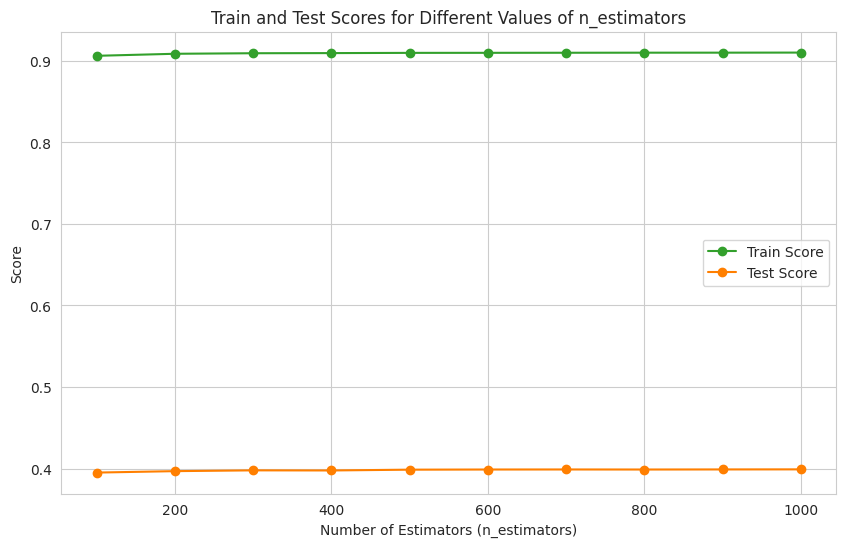

In [335]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train Score', marker='o', color=palette[3])
plt.plot(n_estimators_values, test_scores, label='Test Score', marker='o', color=palette[7])
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Score')
plt.title('Train and Test Scores for Different Values of n_estimators')
plt.legend()
plt.grid(True)
plt.show()

The best R square value that we can get for the test data is with 1000 estimators. I managed to improve the R^2 from 0.3948 to 0.3991. I will try other parameters as well.

In [341]:
rf_model = RandomForestRegressor(n_estimators=1000, max_features="sqrt", random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 278.4858098356562
R-squared (R^2): 0.4079979358819339


In [324]:
model_scores_m

{'LinearRegression': {'MAE': 16.802654160676873,
  'MSE': 449.28688381746696,
  'R^2': 0.044910895969611064},
 'SupportVectorRegression': {'MAE': 16.301673364822832,
  'MSE': 447.32290547100376,
  'R^2': 0.049085899484783035},
 'RandomForestRegression': {'MAE': 12.066001305488156,
  'MSE': 284.67156195463735,
  'R^2': 0.3948483322280868}}

In [346]:
y_pred

array([70.23833333, 54.10423333, 50.81143095, ..., 52.2288    ,
       71.514     , 52.91234295])

In [343]:
df["song_popularity"]

0        73
1        66
2        76
3        74
4        56
         ..
18830    60
18831    60
18832    23
18833    55
18834    60
Name: song_popularity, Length: 18480, dtype: int64

Now I will compare the predictions of the tuned RandomForestRegressor to the original popularities.

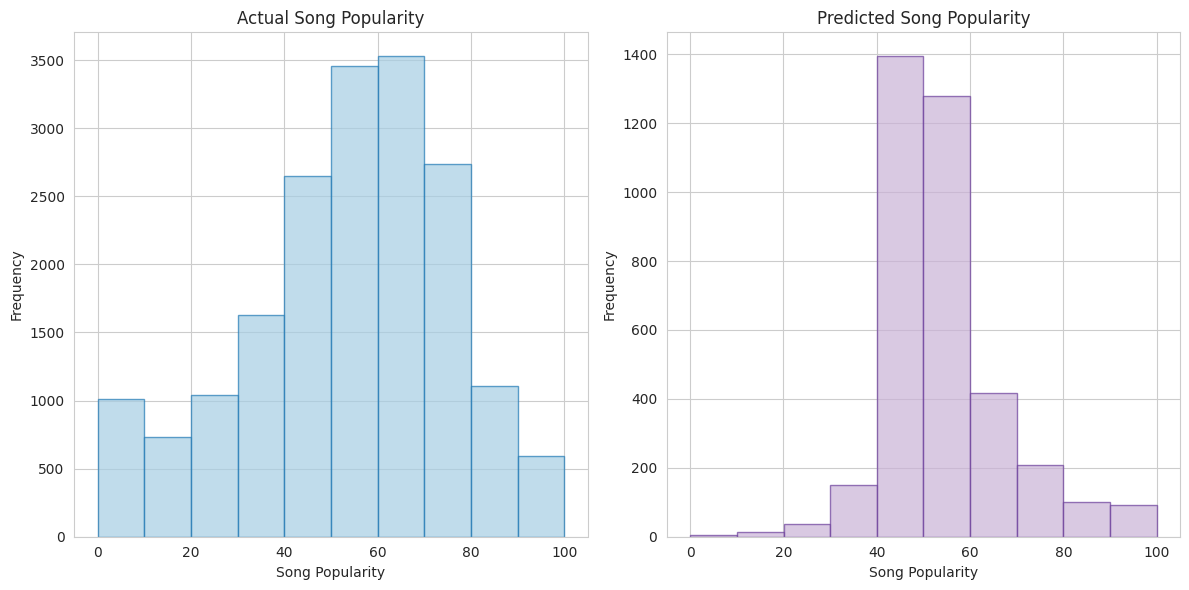

In [354]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#Plotting a histogram for df["song_popularity"]
axes[0].hist(df["song_popularity"], color=palette[0], edgecolor=palette[1], alpha=0.7)
axes[0].set_title('Actual Song Popularity')
axes[0].set_xlabel('Song Popularity')
axes[0].set_ylabel('Frequency')

#Plotting a histogram for y_pred
axes[1].hist(y_pred, color=palette[8], edgecolor=palette[9], alpha=0.7)
axes[1].set_title('Predicted Song Popularity')
axes[1].set_xlabel('Song Popularity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Saving the most well performing model**

In [355]:
import joblib

In [361]:
#Saving the trained model using joblib

joblib.dump(rf_model, 'random_forest_regressor_for_song_data.joblib')

['random_forest_regressor_for_song_data.joblib']

In [362]:
# Load the saved model
loaded_model = joblib.load('random_forest_regressor_for_song_data.joblib')

In [363]:
loaded_model.score(X_test, y_test)

0.4079979358819339